# Basic Statistics

## Data

In statistics, a **variable** is an attribute of an object of study, also called **cases**.

Data is generally divided into two categories, **quantitative data** and **categorical data**.

**Categorical variables** represent **groupings** (sometimes as numbers). There are three types of categorical variables: **binary**, **nominal**, and **ordinal** variables.

* **Binary variables** represent Yes/No values, e.g. heads/tails in a coin flip.
* **Nominal variables** are groups with no rank or order, e.g. colors, species names.
* **Ordinal variables** are groups that are ranked in a specific order, e.g. scaled responses in a survey, finishing place in a race.


**Quantitative variables** represents **amounts** that can be added, subtracted, divided, etc. There are two types of quantitative variables, **discrete** and **continuous**.

* **Discrete Variables** are counts of individual items or values, e.g. number of students in a class or number of different tree species in a forest.
* **Continuous variables** (aka **ratio variables**) are measurements of continuous values, e.g. age, height or distance.

## Levels of Measurement

Levels of measurement tell you **how precisely variables are recorded**:

* **Nominal**: the data can only be categorized
* **Ordinal**: the data can be categorized and ranked
* **Interval**: the data can be categorized, ranked, and evenly spaced
* **Ratio**: the data can be categorized, ranked, evenly spaced, and has a natural zero.

## Data Matrix

A data matrix is the source of your statistical analysis: **rows** represent the **cases**, the objects of interest and **columns** represet the **variables**, the attributes of your objects. The values are called **observations**.

### Example

In this example our **cases** are persons and our **variables** are height (interval data), age (interval data) and gender (nominal data).

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

n = 100
data = {
    'height': np.round(np.random.normal(170, 10, n), decimals=1),                # normal distribution with of 170 and a width of 10
    'age': np.random.randint(20, 31, n),                                         # discrete uniform distribution
    'gender': ['M' if x == 0 else 'F' for x in np.random.randint(0, 2, n)],      # discrete uniform distribution
}
df = pd.DataFrame(data)
df

,height,age,gender
0,168.8,23,F
1,168.0,21,M
2,177.1,21,M
3,177.6,27,M
4,183.9,27,F
...,...,...,...
95,161.3,29,M
96,169.1,28,F
97,182.4,30,M
98,182.2,26,F


## Descriptive Statistics

If you want to present your analyses to other people, you make use of **summaries** of your data.

### Frequency Tables

Frequency tables show how data is **distributed** over the cases.

For **categorial data** this is done by summing up observations with the same value:

In [256]:
s = pd.crosstab(index=df['gender'], columns='observations')
s['percent'] = s / s.sum()
s

col_0,observations,percent
gender,,
F,60,0.6
M,40,0.4


**Quantitative data** can be encoded to **categorial data** (with a lost of information).

In [257]:
df['height_bins'] = pd.cut(x=df['height'], bins=[130, 139, 149, 159, 169, 179, 189, 199])
h = pd.crosstab(index=df['height_bins'], columns='observations')
h['percent'] = h / h.sum()
h

col_0,observations,percent
height_bins,,
"(149, 159]",14,0.14
"(159, 169]",34,0.34
"(169, 179]",31,0.31
"(179, 189]",18,0.18
"(189, 199]",3,0.03


### Categorial Data

Using a **pie chart**, one can immediatelly see **percentage**. Using a **bar chart**, one can easily retrieve **exact numbers**. A bar chart has advantanges in favor of a pie chart if the nuber of categories increases.

The **center of a distribution** can be described by the **mode**. Teh mode is the value which appears **most frequently** (can immediatelly been seen using a pie-chart). There can be multiple modes.

In [258]:
df.mode()

,height,age,gender,height_bins
0,174.9,29,F,"(159, 169]"


### Quantitative Data

For a small sample, use a **dotplot**, for many observations, use a **histogram**.

The **center of a distribution** can be described by the **median** or the **mean**. 

#### Median

The median is the middle value of your observations when they are ordered from the smallest to the largest. Use the median if you have outliers. 

In [259]:
df.median()

height    170.2
age        26.0
dtype: float64

#### Mean

The **mean** $\mu$ or $\overline{x}$ is the sum of all the values divided by the number of observation ${x_1, x_2, ..., x_N}$ (sample size):

$$\mu = \overline{x} = \frac{1}{N}\displaystyle\sum_{i=1}^{N} x_i$$

In [260]:
df.mean()

height    170.265
age        25.490
dtype: float64

#### Standard Deviation

The **variance** is 

$$s^2 = \frac{1}{N-1}\displaystyle\sum_{i=1}^{N} \left( x_i - \overline{x} \right)^2$$

and the **standard deviation** $\sigma$ is 

$$\sigma = \sqrt{s}$$

The differences of the mean from the actual values are squared to prevent positive and negative deviations from neutralizing each other. As a result, the unit of the **variance** is squared which may result in a bad interpretation, e.g. the variance of a length is an area. Therefore we use the square-root of the variance as **standard variation** in order to have correct dimensions.

In [261]:
df.var()

height    97.570783
age       10.737273
dtype: float64

In [262]:
df.std()

height    9.877792
age       3.276778
dtype: float64

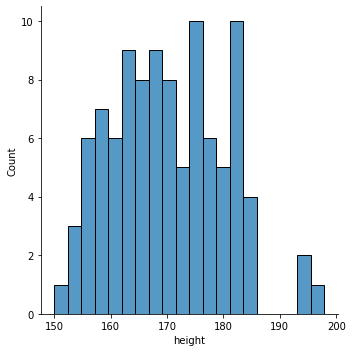

In [263]:
sns.displot(df.height, bins=20);

#### Standardization with z-Score

In order to find out if a **specific observation** is **common** or **exceptional**, we calculate the **z-score** or **standard score**:

$$z = \frac{x-\mu}{\sigma}$$

The **relative deviation** is normalized to the standard deviation with $\mu = 0$ and $\sigma = 1$.

If the histogram of your variable is bell shaped, then

* **68%** of the observations fall between z-scores **-1** and **1**
* **95%** between z-scores of **-2** and **2**
* **99%** between z-scores of **-3** and **3**

This means that for a bell shaped distribution, **a z-score of more than 3 or less than -3** can be conceived of as rather **exceptional**.

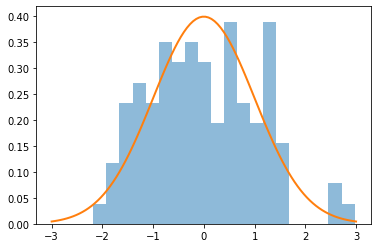

In [264]:
mu = df.height.mean()
std = df.height.std()
z = (df.height - mu) / sigma
plt.hist(z, bins=20, alpha=0.5, density=True)

x = np.linspace(-3, 3, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, linewidth=2);

A rule that applies to any distribution regardless of its shape shape, is that 

* **75%** of the data must lie within a z-score of **±2**
* **89%** within a z-score of **±3**.

So in itself a z-score gives you, to a certain extent, information about how extreme an observation is.

#### Interquartile Range

The **variability of a distribution** can be described by the **range**. The range is the difference between the highest and the lowest value. 

More feasible for describing the variability is the **interquartile range**, as it leaves out the extreme values. the interquartile range divides your distribution into **four equal parts**. The three dividers are called first quartile $\text{Q1}$, second quartile $\text{Q2}$ and third quartile $\text{Q3}$. 

The **second quartile** $\text{Q2}$is the same as the **median** of your sample.

The **interquartile range** $\text{IQR} = \text{Q3} - \text{Q1}$ is not affected by outliers.

As a rule of thumb, observations can be qualified as **outliers** if

$$x_{LO} < \text{Q1} - 1.5 \cdot \text{IQR} \quad \text{or} \quad x_{RO} > \text{Q3} + 1.5 \cdot \text{IQR}$$

#### Box Plot

The box plot is very useful for describing center and variability, and detecting outliers.

The box plot shows you at a glance

* the **maximum** value that is not an outlier, 
* $\text{Q3}$,
* $\text{Q2}$ or the **mean**,
* $\text{Q1}$,
* the **minimum** value that is not an outlier,
* the **outliers**

In [265]:
df.height.describe()

count    100.000000
mean     170.265000
std        9.877792
min      150.000000
25%      163.575000
50%      170.200000
75%      177.450000
max      197.900000
Name: height, dtype: float64

In [266]:
# filter outliers in a data series
h = df.height
iqr = h.quantile(0.75) + h.quantile(0.25)
lo = h.quantile(0.25) - 1.5 * iqr
ro = h.quantile(0.75) + 1.5 * iqr


h_without_outliers = h[(h > lo) & (h < ro)]
h_outliers = h[(h <= lo) | (h >= ro)]
h_outliers

Series([], Name: height, dtype: float64)

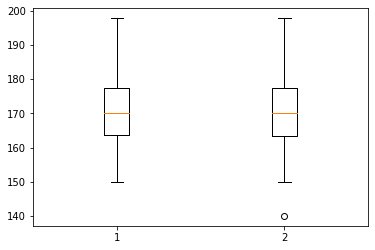

In [267]:
heights = df.height.append(pd.Series([140], index=[100]))  # add a artifical outlier
plt.boxplot([df.height, heights]);

The length of the box represents the $\text{IQR}$. The horizontal line inside the box is the median or in other words, $\text{Q2}$.